In [15]:
import sys
sys.path.insert(0, "..")
# sys.path.insert(0, "../data_split")

import numpy as np
import os
from os.path import join, exists
import pandas as pd
from tqdm import tqdm
from argparse import ArgumentParser
import json
from data_split.data_utils import DataSplitter
import json
import itertools

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
TRAINING_SETUPS = list(itertools.product(['A', 'B', 'C', 'D'], ["random", "partitioned"], np.arange(10))) + \
                  list(itertools.product(['A', 'B', 'C', 'D'], ["drugs_zero_shot"], np.arange(60)))


In [6]:
drugs_df = pd.read_csv("../processed_data/drug_fingerprints.csv", index_col=0)
driams_long_table = pd.read_csv("../processed_data/DRIAMS_combined_long_table.csv")
driams_long_table = driams_long_table[driams_long_table["drug"].isin(drugs_df.index)]
driams_long_table

,species,sample_id,drug,response,dataset
0,Staphylococcus epidermidis,e9adf43d-679b-497c-9849-1fa214838dd3,Meropenem,1,A
1,Staphylococcus epidermidis,e9adf43d-679b-497c-9849-1fa214838dd3,Ciprofloxacin,1,A
2,Staphylococcus epidermidis,e9adf43d-679b-497c-9849-1fa214838dd3,Cefepime,1,A
3,Staphylococcus epidermidis,e9adf43d-679b-497c-9849-1fa214838dd3,Cotrimoxazole,0,A
4,Staphylococcus epidermidis,e9adf43d-679b-497c-9849-1fa214838dd3,Imipenem,1,A
...,...,...,...,...,...
652766,Staphylococcus aureus,08bc8410-51ec-46d7-ac7b-afba9e6ba2cd_3313,Linezolid,0,D
652767,Staphylococcus aureus,08bc8410-51ec-46d7-ac7b-afba9e6ba2cd_3313,Rifampicin,0,D
652768,Staphylococcus aureus,08bc8410-51ec-46d7-ac7b-afba9e6ba2cd_3313,Tetracycline,0,D
652769,Staphylococcus aureus,08bc8410-51ec-46d7-ac7b-afba9e6ba2cd_3313,Tigecycline,0,D


In [8]:
datasets = ["A", "B", "C", "D"]

imbalance_df = []


for dset, split_type, seed in tqdm(TRAINING_SETUPS):
    dsplit = DataSplitter(driams_long_table, dataset=dset)
    target_drug = ""
    
    if split_type=="random":
        train_df, val_df, test_df = dsplit.random_train_val_test_split(val_size=0.1, test_size=0.2, random_state=seed)
    elif split_type=="partitioned":
        trainval_df, test_df = dsplit.combination_train_test_split(dsplit.long_table, test_size=0.2, random_state=seed)
        train_df, val_df = dsplit.baseline_train_test_split(trainval_df, test_size=0.2, random_state=args.seed)
    elif split_type =="drugs_zero_shot":
        drugs_list = sorted(dsplit.long_table["drug"].unique())
        if seed>=len(drugs_list):
            print("Drug index out of bound, exiting..\n\n")
            continue
        target_drug = drugs_list[seed]W
        test_df, trainval_df = dsplit.drug_zero_shot_split(drug=target_drug)
    imbalance_df.append({"dataset": dset, "seed": seed, "Frac. Resistant": test_df["response"].mean(), "drug": target_drug})
                        
imbalance_df = pd.DataFrame(imbalance_df)
imbalance_df
                    

 36%|███▌      | 100/280 [00:08<00:11, 16.01it/s]

Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..




 51%|█████     | 142/280 [00:09<00:03, 39.03it/s]

Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..




 54%|█████▍    | 152/280 [00:09<00:03, 40.75it/s]

Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..




 58%|█████▊    | 162/280 [00:10<00:02, 40.97it/s]

Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..




 76%|███████▌  | 213/280 [00:11<00:01, 38.14it/s]

Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..




 79%|███████▉  | 222/280 [00:11<00:01, 37.58it/s]

Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..




 92%|█████████▏| 257/280 [00:13<00:00, 30.77it/s]

Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..




 95%|█████████▍| 265/280 [00:13<00:00, 33.70it/s]

Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..




 98%|█████████▊| 273/280 [00:13<00:00, 36.06it/s]

Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..




100%|██████████| 280/280 [00:13<00:00, 20.57it/s]

Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..


Drug index out of bound, exiting..




,dataset,seed,Frac. Resistant,drug
0,A,0,0.205421,
1,A,1,0.205421,
2,A,2,0.205421,
3,A,3,0.205421,
4,A,4,0.205421,
...,...,...,...,...
198,D,27,0.098162,Tetracycline
199,D,28,0.703057,Ticarcillin
200,D,29,0.000652,Tigecycline
201,D,30,0.036923,Tobramycin


In [8]:
test_df["response"].mean()

0.20542108316194696

In [14]:
folder = "outputs/Imbalance"
imbalance_df = []

for fname in os.listdir(folder):
    # print(fname)
    with open(os.path.join(folder, fname), "r") as f:
        m = json.load(f)
    imbalance_df.append(m)
    # break
    
imbalance_df = pd.DataFrame(imbalance_df)
imbalance_df

,dataset,seed,split_type,Frac. Resistant,drug
0,A,30,drugs_zero_shot,0.233781,Imipenem
1,A,26,drugs_zero_shot,0.392593,Fluconazole
2,A,23,drugs_zero_shot,0.114286,Doxycycline
3,A,8,partitioned,0.166050,
4,A,22,drugs_zero_shot,0.008784,Daptomycin
...,...,...,...,...,...
232,A,40,drugs_zero_shot,0.006553,Mupirocin
233,A,44,drugs_zero_shot,0.737058,Penicillin
234,C,21,drugs_zero_shot,0.400797,Fosfomycin
235,C,7,drugs_zero_shot,0.000000,Cefotaxime


In [34]:
split_mappings = {
    "random": "Random",
    "partitioned": "Species-drug zero-shot",
    "drugs_zero_shot": "Drug zero-shot"
}
imbalance_df["split"] = imbalance_df["split_type"].map(split_mappings)
imbalance_df["DRIAMS dataset"] = imbalance_df["dataset"]
imbalance_df

,dataset,seed,split_type,Frac. Resistant,drug,split,DRIAMS dataset
0,A,30,drugs_zero_shot,0.233781,Imipenem,Drug zero-shot,A
1,A,26,drugs_zero_shot,0.392593,Fluconazole,Drug zero-shot,A
2,A,23,drugs_zero_shot,0.114286,Doxycycline,Drug zero-shot,A
3,A,8,partitioned,0.166050,,Species-drug zero-shot,A
4,A,22,drugs_zero_shot,0.008784,Daptomycin,Drug zero-shot,A
...,...,...,...,...,...,...,...
232,A,40,drugs_zero_shot,0.006553,Mupirocin,Drug zero-shot,A
233,A,44,drugs_zero_shot,0.737058,Penicillin,Drug zero-shot,A
234,C,21,drugs_zero_shot,0.400797,Fosfomycin,Drug zero-shot,C
235,C,7,drugs_zero_shot,0.000000,Cefotaxime,Drug zero-shot,C


In [35]:
sns.set_context("paper", font_scale=1.6)

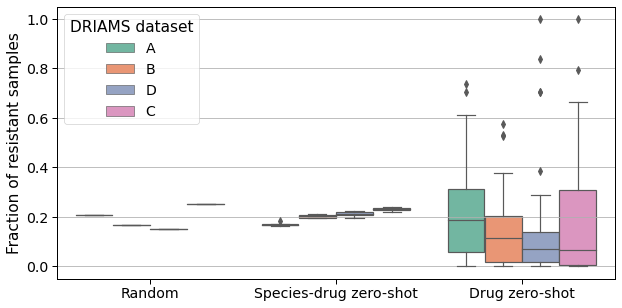

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(data=imbalance_df, x="split", y="Frac. Resistant", order=["Random", "Species-drug zero-shot", "Drug zero-shot"], hue="DRIAMS dataset", ax=ax, palette="Set2")
ax.yaxis.grid(True)
ax.set_ylabel("Fraction of resistant samples")
ax.set_xlabel("")
plt.show()
fig.savefig("outputs/plots/imbalance_test_sets.pdf", bbox_inches="tight")
